In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error 
import pickle

In [2]:
data = pd.read_csv('abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.shape

(4177, 9)

In [4]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<Axes: >

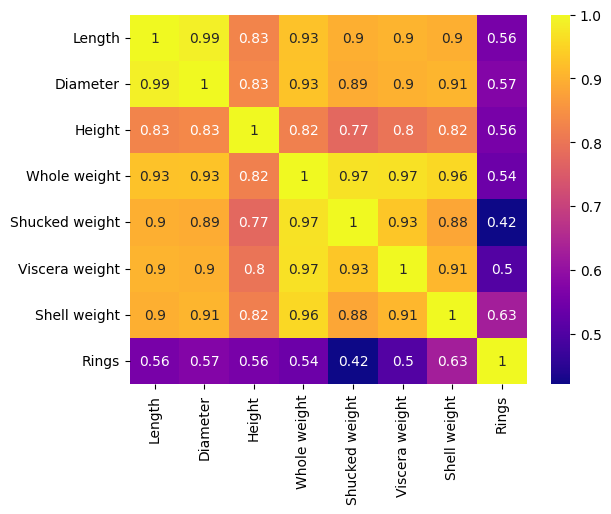

In [9]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='plasma')

### EDA

<Axes: xlabel='Sex', ylabel='count'>

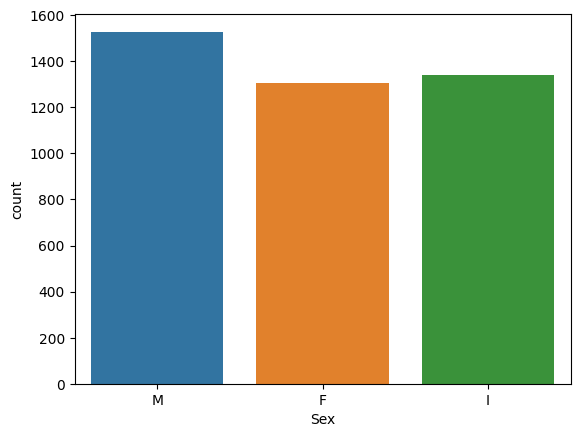

In [14]:
sns.countplot(data=data,x='Sex',hue='Sex')

<Axes: xlabel='Rings', ylabel='Count'>

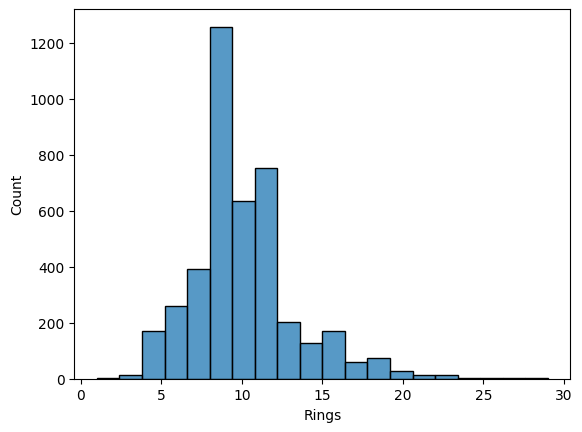

In [16]:
sns.histplot(data=data,x='Rings',bins=20)

<Axes: xlabel='Length', ylabel='Rings'>

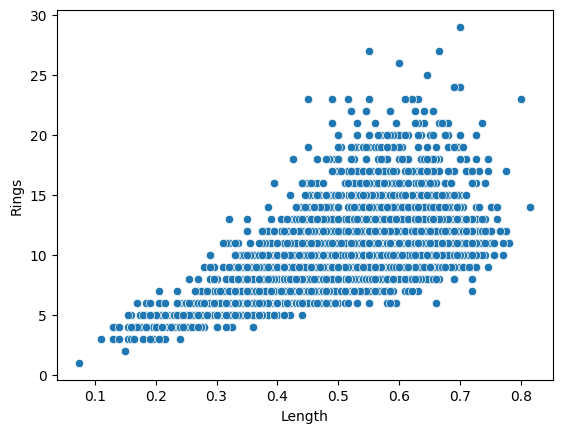

In [17]:
sns.scatterplot(data=data,x='Length',y='Rings')

### Encoding

In [18]:
data['Sex'] = data['Sex'].map({'M':0,'F':1,'I':2})
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Model Building

In [19]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [20]:
X.shape

(4177, 8)

In [21]:
Y.shape

(4177,)

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
X_train.shape

(3341, 8)

In [26]:
X_test.shape

(836, 8)

In [28]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [30]:
models = [
    ('LinearRegression',LinearRegression()),
    ('Ridge',Ridge()),
    ('Lasso',Lasso()),
    ('DecisionTreeRegressor',DecisionTreeRegressor()),
    ('RandomForestRegressor',RandomForestRegressor())
]

In [32]:
for name,model in models:
    model.fit(X_train_scale,Y_train)
    Y_pred = model.predict(X_test_scale)

    print(f'{name} MSE: {mean_squared_error(Y_test,Y_pred)} R2score: {r2_score(Y_test,Y_pred)}')

LinearRegression MSE: 4.950310502936191 R2score: 0.5427053625654411
Ridge MSE: 4.950401649629027 R2score: 0.5426969427110039
Lasso MSE: 7.693870319549444 R2score: 0.28926364595513365
DecisionTreeRegressor MSE: 8.851674641148325 R2score: 0.18230920195577516
RandomForestRegressor MSE: 4.99444581339713 R2score: 0.5386282767375268


### Selection Model

In [33]:
linear = LinearRegression()
linear.fit(X_train_scale,Y_train)
Y_pred = linear.predict(X_test_scale)

In [35]:
data.rename(columns={'Whole Weight':'Whole_Weight','Shucked Weight':'Shucked_Weight','Viscera weight':'Viscera_weight','Shell weight':'Shell_weight'},inplace=True)

In [36]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
def prediction(Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_weight,Shell_weight):
    features = np.array([[Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_weight,Shell_weight]])
    pred = linear.predict(features).reshape(1,-1)
    return pred[0]

In [41]:
Sex=1
Length=4.5
Diameter=5.5
Height=8.4
Whole_Weight=10.4
Shucked_Weight=5.6
Viscera_weight=7.2
Shell_weight=11.2

res = prediction(Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_weight,Shell_weight)
print(res)

[46.54405151]


In [44]:
pickle.dump(linear,open('model.pkl','wb'))